# В этом ноутбуке реализован разведочный анализ данных об объявлениях о продаже автомобилей. 

*   Исследование целевой переменной
*   Исследование влияния некоторых пременных на цену авто 
*   Вывод дополнительной информации о датасете
*   Удаление нерелевантных данных
*   Проверка гипотез 



# Загрузка данных

**Описание датасета**

Данные о характеристиках и ценах автомобилей с пробегом собранные с сайта [olx.ua](https://olx.ua).

* **after_an_accident** - автомобиль после аварии
* **brand** - бренд автомобиля
* **car_body** - тип кузова
* **cleared_customs** - растоможен автомобиль или нет
* **color** - цвет кузова
* **created_time** - время создания объявления
* **drive_type** - привод
* **exterior_condition** - внешнее состояние
* **fine_condition** - автомобиль в хорошем состоянии
* **first_owner** - первый владелец
* **fuel_type** - тип топлива
* **garage_storage** - гаражное хранение
* **lat** - широта
* **lon** - долгота
* **model** - модель автомобиля
* **motor_engine_size_litre** - объём двигателя в литрах
* **motor_mileage_thou** - пробег автомобиля в километрах
* **motor_year** - год выпуска автомобиля
* **needs_body_repair** - требует восстановления кузова
* **needs_engine_repair** - требует восстановления двигателя
* **needs_undercarriage_repair** - требует восстановления подвески
* **not_bit** - не бита
* **not_colored** - не крашена
* **not_on_the_move** - не на ходу
* **price** - цена (целевая переменная)
* **region** - область или регион
* **transmission_type** - тип коробки передач

In [ ]:
!rm -rf sample_data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("max_columns", 100)
sns.set_style("whitegrid")

!rm cars_preprocessed.csv
!wget https://gitlab.com/glebtutik/car_price_estimation_data/-/raw/main/cars_preprocessed.csv 

Загрузим датафрейм из csv и выведем общую информацию о данных

In [ ]:
df = pd.read_csv("cars_preprocessed.csv")
df.shape

(126271, 28)

In [ ]:
df.head()

,created_time,cleared_customs,brand,model,motor_year,motor_mileage_thou,car_body,color,transmission_type,drive_type,fuel_type,motor_engine_size_litre,exterior_condition,region,lat,lon,price,after_an_accident,fine_condition,first_owner,garage_storage,needs_body_repair,needs_engine_repair,needs_undercarriage_repair,not_bit,not_colored,not_on_the_move,service_book
0,1674420147,True,Opel,corsa,2011.0,170.0,hatchback,Красный,Механічна,front,Дизель,1.3,major_fixes_needed,Львовская область,49.90548,24.09005,100.000000,True,False,False,False,False,False,False,False,False,False,False
1,1674820489,True,ВАЗ,2106,1992.0,285.0,sedan,Синий,Механічна,back,Бензин,1.6,minor_scratches,Львовская область,50.09947,24.34957,81.603786,False,False,False,False,False,True,False,False,False,False,False
2,1673901093,True,ВАЗ,2101,1979.0,145.0,sedan,Белый,Механічна,back,Бензин,1.3,major_fixes_needed,Днепропетровская область,48.40500,35.01300,68.003155,False,False,False,False,True,False,False,False,False,False,False
3,1674493733,True,ВАЗ,2101,1972.0,500.0,sedan,Синий,Механічна,back,Бензин,1.5,minor_fixes_needed,Ровненская область,51.33987,26.60507,54.402524,False,True,False,False,False,False,False,False,False,False,False
4,1671384856,True,ЗАЗ,965,1987.0,100.0,coupe,Зеленый,Механічна,back,Бензин,1.0,minor_scratches,Винницкая область,48.99579,29.43972,150.000000,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
df.describe()

,created_time,motor_year,motor_mileage_thou,motor_engine_size_litre,lat,lon,price
count,1.262710e+05,126271.000000,126271.000000,126271.000000,126271.000000,126271.000000,126271.000000
mean,1.664626e+09,2003.665782,249.286024,1.855101,49.251972,30.021599,6364.543473
std,1.941432e+07,9.967211,289.991766,0.611016,1.279449,4.136431,6273.675734
min,1.361267e+09,1930.000000,0.000000,0.000000,44.962800,22.160770,27.271141
25%,1.661282e+09,1999.000000,159.000000,1.500000,48.450030,26.134305,2200.000000
50%,1.672248e+09,2006.000000,216.000000,1.800000,49.406110,30.502430,4800.000000
75%,1.675067e+09,2011.000000,269.500000,2.000000,50.356840,33.392000,8450.000000
max,1.677556e+09,2022.000000,3000.000000,5.900000,52.260000,40.129010,100000.000000


Проверим, есть ли пропуски 

In [ ]:
df.isna().sum()

created_time                  0
cleared_customs               0
brand                         0
model                         0
motor_year                    0
motor_mileage_thou            0
car_body                      0
color                         0
transmission_type             0
drive_type                    0
fuel_type                     0
motor_engine_size_litre       0
exterior_condition            0
region                        0
lat                           0
lon                           0
price                         0
after_an_accident             0
fine_condition                0
first_owner                   0
garage_storage                0
needs_body_repair             0
needs_engine_repair           0
needs_undercarriage_repair    0
not_bit                       0
not_colored                   0
not_on_the_move               0
service_book                  0
dtype: int64

Как и ожидалось, пропуски отсутствуют, мы заполнили их на предыдущем этапе.

# Исследуем целевую переменную (price)

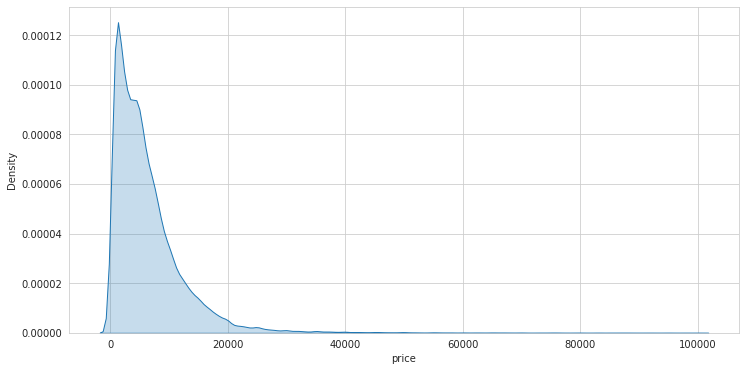

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df["price"], fill=True)

plt.show()

In [ ]:
print(f"Первый квартиль: {df.price.quantile(0.25)}")
print(f"Третий квартиль: {df.price.quantile(0.75)}")
print(f"Среднее: {df.price.mean()}")
print(f"Медиана: {df.price.median()}")
print(f"Мода: {df.price.mode()[0]}")

Первый квартиль: 2200.0
Третий квартиль: 8450.0
Среднее: 6364.543472538333
Медиана: 4800.0
Мода: 4500.0


На графике выше виден длинный хвост выбросов с ценой выше $20000. Рассмотрим переменную в boxplot:

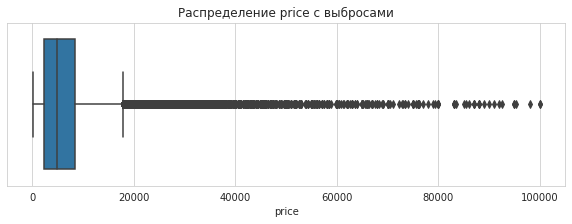

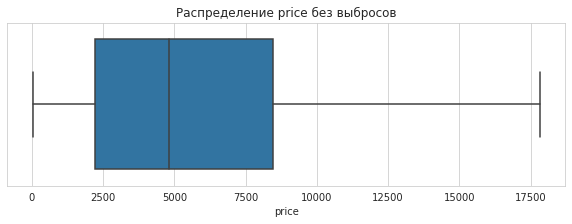

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df["price"], showfliers=True)
plt.title("Распределение price с выбросами")

plt.figure(figsize=(10, 3))
sns.boxplot(x=df["price"], showfliers=False)
plt.title("Распределение price без выбросов")

plt.show()

Как можно видеть на графике boxplot, цена без выбросов варьируется в диапазоне от 0 до 19000 долларов. Медиана цены находится примерно в 5000.

Оценим количество выбросов:

In [ ]:
Q1 = df["price"].quantile(0.25)  # Первый квартиль
Q3 = df["price"].quantile(0.75)  # Третий квартиль
IQR = Q3 - Q1  # Интерквартильный размах

filt = (df["price"] < (Q1 - 1.5 * IQR)) | (df["price"] > (Q3 + 1.5 * IQR))

outliers_shape = df[filt].shape

print(f"Количество выбросов: {outliers_shape[0]}. Это примерно {round(outliers_shape[0] / df.shape[0] * 100, 2)}% от всего датасета.")

Количество выбросов: 5716. Это примерно 4.53% от всего датасета.


При выборе loss-функции нужно учесть хвост выбросов справа.

Визуализируем матрицу корреляции между столбцами:

<AxesSubplot:>

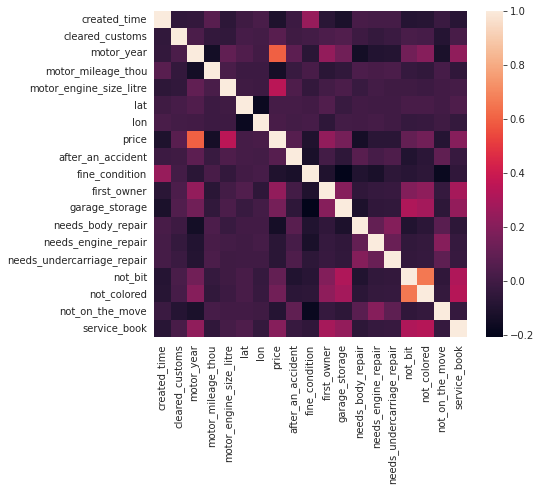

In [ ]:
# Сохраним матрицу корреляции в переменную
correlation = df[df.columns].corr()

# Выведем heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(correlation)

Посмотрим, какие признаки наиболее корелирут с целевой переменной

In [ ]:
# Выведем корелляции только для переменной price. Отсортируем список по убыванию
correlation[["price"]].sort_values(by="price", ascending=False)

,price
price,1.000000
motor_year,0.595002
motor_engine_size_litre,0.345401
first_owner,0.233285
service_book,0.202997
garage_storage,0.153097
not_colored,0.144808
not_bit,0.099931
cleared_customs,0.071020
after_an_accident,0.064262


Сильнее всего с ценой кореллируют признаки **motor_year** - год выпуска авто, и **motor_engine_size_litre** - объём двигателя.

Посмотрим, кореллирут ли они между собой:

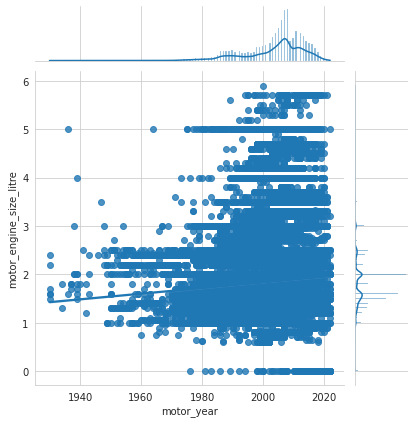

In [ ]:
sns.jointplot(data=df, y="motor_engine_size_litre", x="motor_year", kind='reg')

plt.show()

Выведем коэффициент корреляции между годом выпуска авто и объёмом двигателя

In [ ]:
correlation.loc["motor_engine_size_litre", "motor_year"]

0.0951886729110855

Как видим, переменные почти не кореллируют.

### Посмотрим количество автомобилей по маркам:

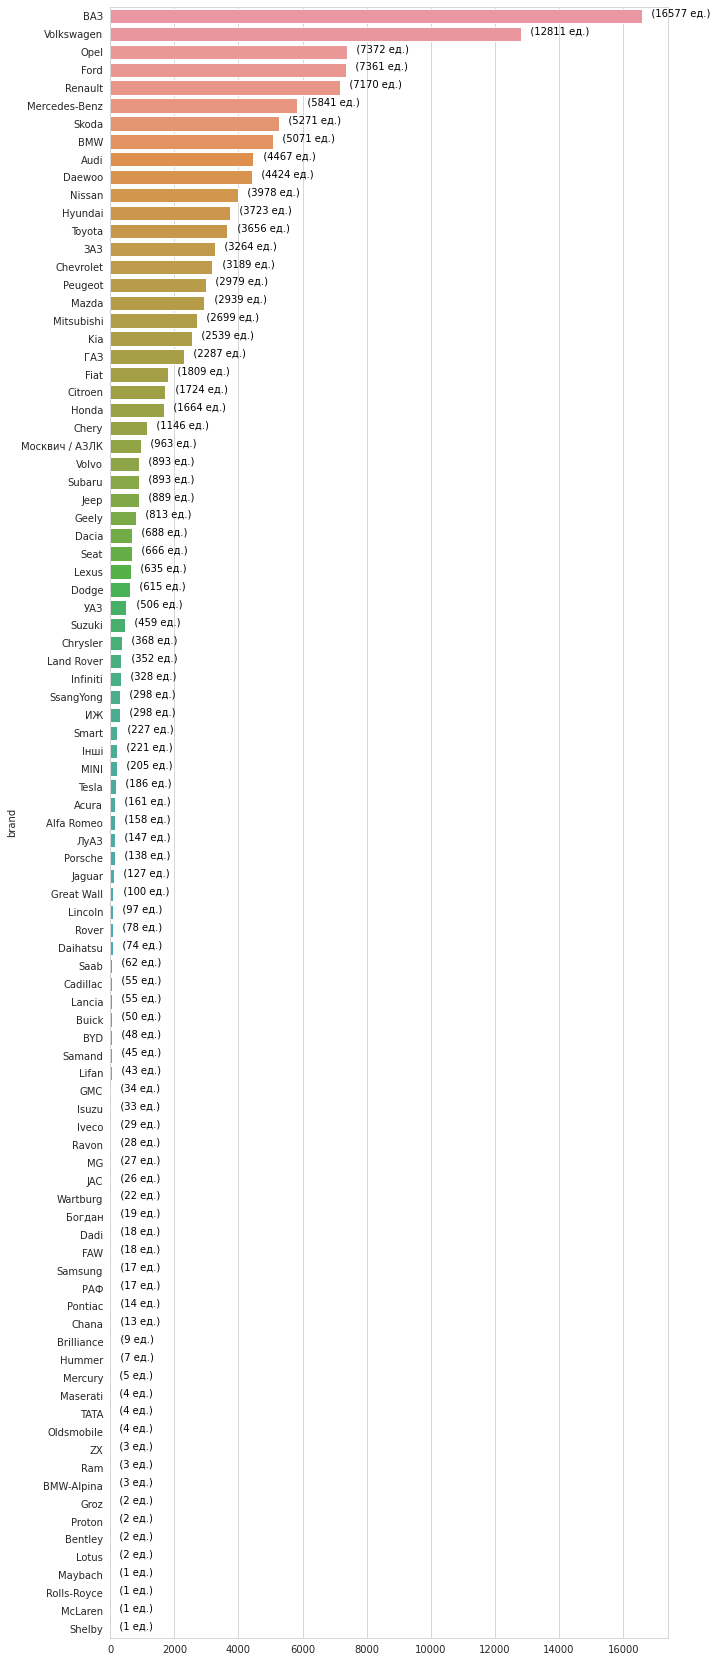

In [ ]:
plt.figure(figsize=(10, 30))
brand_counts = df.groupby("brand").size().sort_values(ascending=False)

sns.barplot(y=brand_counts.index,
            x=brand_counts.values)

for i, v in enumerate(brand_counts.values):
    plt.text(v + 3, i, f"   ({str(v)} ед.)", color="black")

plt.show()

Марки, количество которых меньше 30, обозначим как "Another":

In [ ]:
filt = df["brand"].isin(brand_counts[brand_counts <= 30].index)
df.loc[filt, "brand"] = "Another"

### Посмотрим географическое расположение автомобилей

Распределение авто по регионам

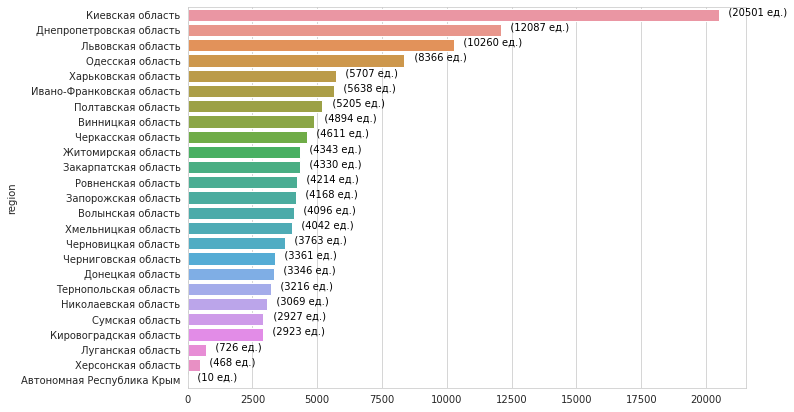

In [ ]:
plt.figure(figsize=(10, 7))
reg_counts = df.groupby("region").size().sort_values(ascending=False)

sns.barplot(y=reg_counts.index,
            x=reg_counts.values)

for i, v in enumerate(reg_counts.values):
    plt.text(v + 3, i, f"   ({str(v)} ед.)", color="black")

plt.show()

Используя scatter-plot визуализируем географические координаты объявлений. Цветом точки обозначим цену

In [ ]:
%%capture

# Установка geopandas
!pip install geopandas

# Импорт
import geopandas as gpd

# Загрузка полигонов
!rm -r occupied_area.geojson ukraine.geojson
!wget https://gitlab.com/glebtutik/car_price_estimation_data/-/raw/main/occupied_area.geojson
!wget https://gitlab.com/glebtutik/car_price_estimation_data/-/raw/main/ukraine.geojson

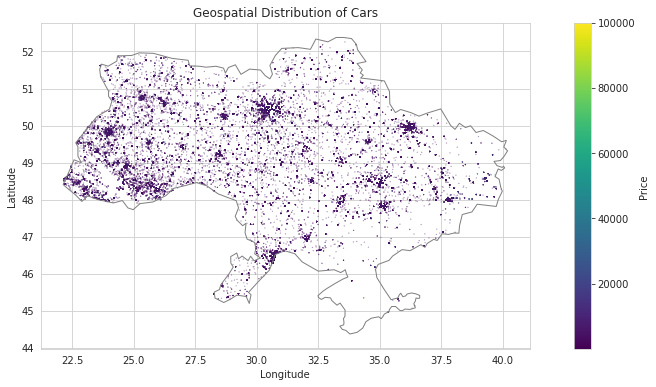

In [ ]:
gdf_ukr = gpd.read_file("ukraine.geojson")

plt.figure(figsize=(16, 6))
plt.scatter(df["lon"], df["lat"], c=df["price"], s=0.03, cmap="viridis")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Distribution of Cars")
plt.colorbar(label="Price")

ax = plt.gca()
gdf_ukr.plot(ax=ax, facecolor="none", edgecolor="gray")

plt.show()

Из графика видно, что большая часть автомобилей располагается на западе страны и в крупных городах (Киев, Львов, Харьков и т.д.)

Посмотрим сколько автомобилей расположено на территории оккупированной на момент сбора данных. Для этого откроем файл `occupied_area.geojson` содержащий полигон примерно описывающий оккупированную территорию.

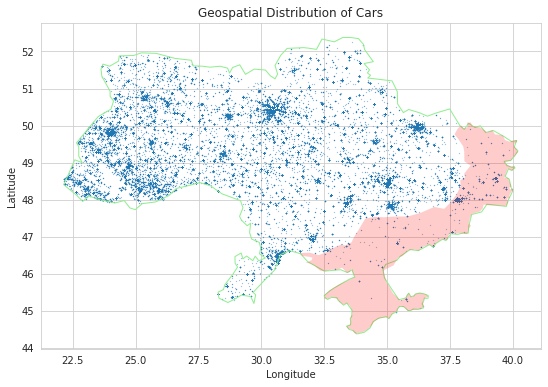

In [ ]:
gdf_occupied = gpd.read_file("occupied_area.geojson")

plt.figure(figsize=(10, 6))
plt.scatter(df["lon"], df["lat"], s=0.03)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Distribution of Cars")

ax = plt.gca()
gdf_ukr.plot(ax=ax, facecolor="none", edgecolor="lightgreen", linewidth=1)
gdf_occupied.plot(ax=ax, facecolor="red", edgecolor="none", alpha=0.2)

plt.show()

На графике видно, что на оккупированной территории (закрашена красным) объявлений меньше. Значительное количество объявлений только в Донецке. Подсчитаем их:

In [ ]:
import json
from shapely.geometry import Polygon, Point

# Загрузим полигон из json-файла
with open("occupied_area.geojson") as f:
    geojson_data = json.load(f)

coordinates = geojson_data["features"][0]["geometry"]["coordinates"][0]
polygon = Polygon(coordinates)

# Проверим координаты каждого объявления, лежат ли они внутри полигона
filt = df.apply(lambda row: polygon.contains(Point(row["lon"], row["lat"])), axis=1)

# Количество объявлений на оккупированной территории
df[filt].shape

(2637, 28)

Удалим данные об автомобилях на этой территории и визуализируем снова чтобы удостовериться, что всё прошло успешно

In [ ]:
df = df[~filt]
df = df[df["region"] != "Автономная Республика Крым"]
df.shape

(123630, 28)

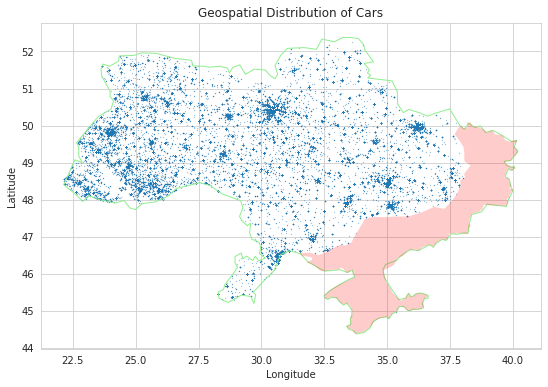

In [ ]:
gdf_occupied = gpd.read_file("occupied_area.geojson")

plt.figure(figsize=(10, 6))
plt.scatter(df["lon"], df["lat"], s=0.03)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Distribution of Cars")

ax = plt.gca()
gdf_ukr.plot(ax=ax, facecolor="none", edgecolor="lightgreen", linewidth=1)
gdf_occupied.plot(ax=ax, facecolor="red", edgecolor="none", alpha=0.2)

plt.show()

Посмотрим как зависит цена от региона

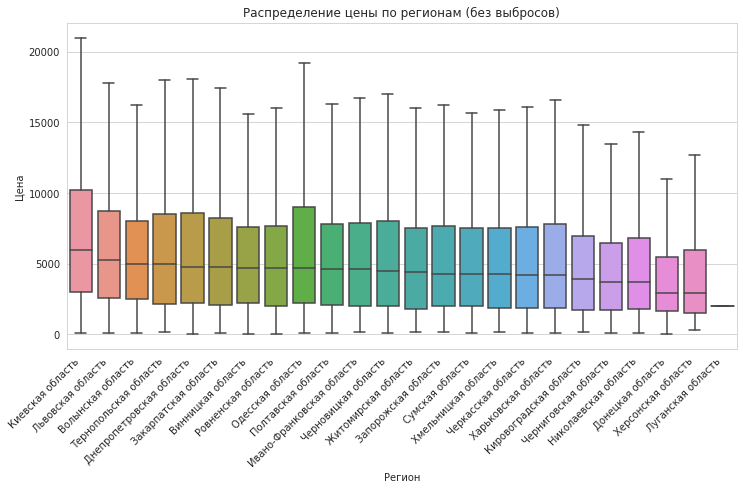

In [ ]:
# Группировка по регионам и вычисление для них медианной цены
median_prices_by_region = df.groupby("region")["price"].median()

# Сортируем по меддианной цене
median_prices_sorted = median_prices_by_region.sort_values(ascending=False)

# Имена регионов
region_order = median_prices_sorted.index.values

# Создание графика boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="region", y="price", data=df, order=region_order, showfliers=False)

# Поворот названий регионов на 45 градусов
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Оформление графика
plt.xlabel("Регион")
plt.ylabel("Цена")
plt.title("Распределение цены по регионам (без выбросов)")
plt.show()


Как и ожидалось, самые дорогие автомобили расположены в Киевской области (включает в себя Киев). Кроме того, там цены имеют наибольшую вариативность (на втором месте Одесская область). В остальных регионах медианная цена отличается не так значительно. 

# Проверка гипотез

1. Чем больше год выпуска тем выше цена автомобиля

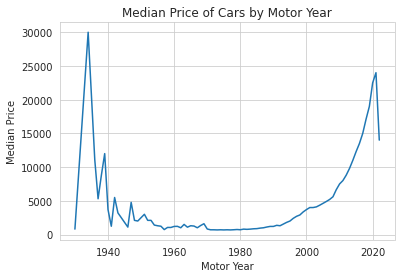

In [ ]:
# Сгруппируем семплы по году выпуска авто и вычислим медианную цену 
df_year_price = df.groupby("motor_year")["price"].median().reset_index()

# Визуализация на графике
sns.lineplot(x="motor_year", y="price", data=df_year_price)

# Подписи к графику
plt.xlabel("Motor Year")
plt.ylabel("Median Price")
plt.title("Median Price of Cars by Motor Year")

plt.show()

На графике видно, что гипотеза верна для данных начиная примерно с 1970 года. Однако, медианная цена на ретро-автомобили выпущенные раньше 1950 года даже больше, чем цена на новые авто. Можно добавить переменную указывающую на то, что автомобиль ретро.

Посмотрим, сколько таких автомобилей:

In [ ]:
filt = df["motor_year"] <= 1950
df.loc[filt].shape[0]

59

Как видим, автомобилей с годом выпуска раньше 1950 всего 59. Вводить дополнительную переменную нецелесообразно

Посмотрим, как цена авто зависит от типа корбки передач, типа кузова и типа топлива:

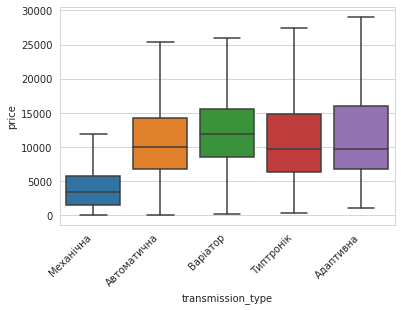

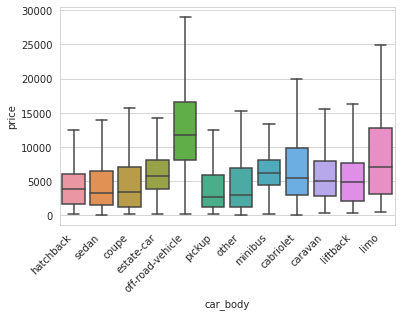

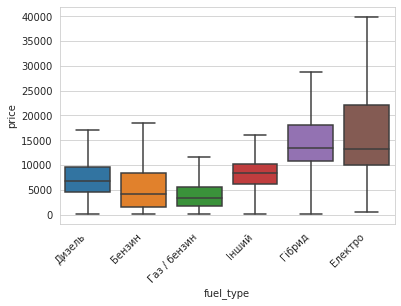

In [ ]:
columns = ["transmission_type", "car_body", "fuel_type"]

for col in columns:
    ax = sns.boxplot(x=col, y='price', data=df, showfliers=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.show()

Посмотрим как влияют булевые столбцы на цену:

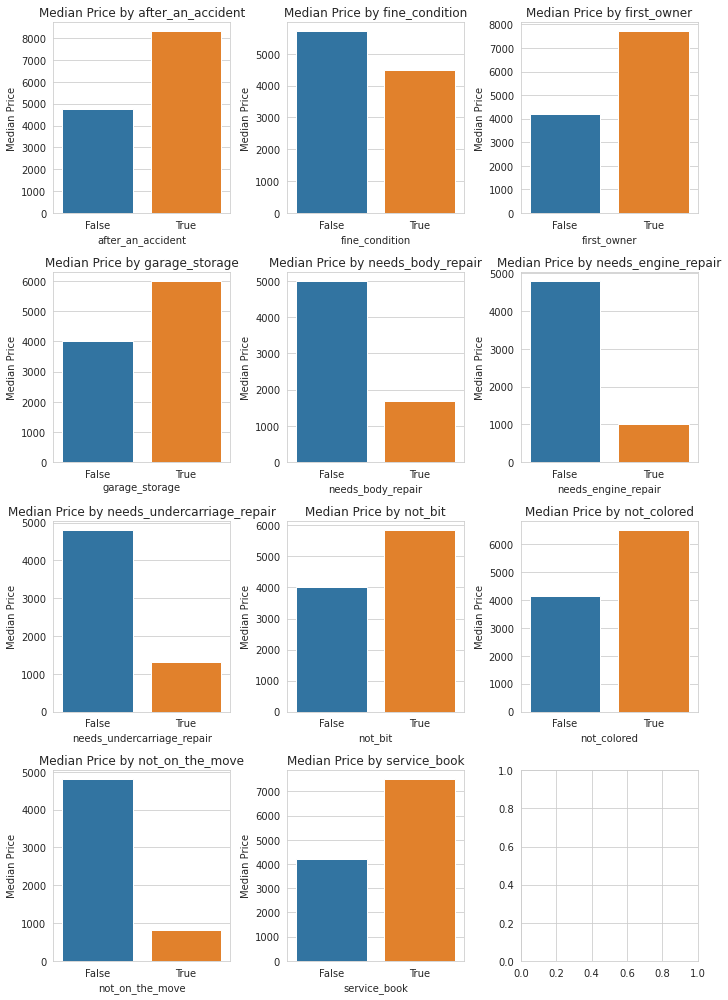

In [ ]:
bool_cols = ['after_an_accident', 'fine_condition', 'first_owner', 
             'garage_storage', 'needs_body_repair', 'needs_engine_repair', 
             'needs_undercarriage_repair', 'not_bit', 'not_colored', 
             'not_on_the_move', 'service_book']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 14))

for i, col_name in enumerate(bool_cols):
    row = i // 3
    col = i % 3
    sns.barplot(x=col_name, y='price', data=df, estimator=np.median, ci=None, ax=axes[row, col])
    axes[row, col].set_xlabel(col_name)
    axes[row, col].set_ylabel('Median Price')
    axes[row, col].set_title(f'Median Price by {col_name}')

plt.tight_layout()
plt.show()


Добавим столбец "age" - возраст автомобиля и удалим столбцы "created_time" и "motor_year"

In [ ]:
df["age"] = df["motor_year"].apply(lambda year: 2023 - year)

In [ ]:
df = df.drop("created_time", axis=1)
df = df.drop("motor_year", axis=1)

df.head()

,cleared_customs,brand,model,motor_mileage_thou,car_body,color,transmission_type,drive_type,fuel_type,motor_engine_size_litre,exterior_condition,region,lat,lon,price,after_an_accident,fine_condition,first_owner,garage_storage,needs_body_repair,needs_engine_repair,needs_undercarriage_repair,not_bit,not_colored,not_on_the_move,service_book,age
0,True,Opel,corsa,170.0,hatchback,Красный,Механічна,front,Дизель,1.3,major_fixes_needed,Львовская область,49.90548,24.09005,100.000000,True,False,False,False,False,False,False,False,False,False,False,12.0
1,True,ВАЗ,2106,285.0,sedan,Синий,Механічна,back,Бензин,1.6,minor_scratches,Львовская область,50.09947,24.34957,81.603786,False,False,False,False,False,True,False,False,False,False,False,31.0
2,True,ВАЗ,2101,145.0,sedan,Белый,Механічна,back,Бензин,1.3,major_fixes_needed,Днепропетровская область,48.40500,35.01300,68.003155,False,False,False,False,True,False,False,False,False,False,False,44.0
3,True,ВАЗ,2101,500.0,sedan,Синий,Механічна,back,Бензин,1.5,minor_fixes_needed,Ровненская область,51.33987,26.60507,54.402524,False,True,False,False,False,False,False,False,False,False,False,51.0
4,True,ЗАЗ,965,100.0,coupe,Зеленый,Механічна,back,Бензин,1.0,minor_scratches,Винницкая область,48.99579,29.43972,150.000000,False,False,False,False,True,False,False,False,False,False,False,36.0


# Сохранение результатов

In [ ]:
df.to_csv("cars_dataset.csv", index=False)